<a href="https://colab.research.google.com/github/karthikrocksit/Deep_Learning-/blob/main/NLP_Proj_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pp
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [49]:
import os
for dirname, _, filenames in os.walk('/content/drive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/02. DataModeling.pdf
/content/drive/MyDrive/convert-jpg-to-pdf.net_2017-01-26_16-18-47.pdf
/content/drive/MyDrive/Doc Feb 8, 2018 at 10-19 AM.pdf
/content/drive/MyDrive/I-140 Approval Notice.pdf
/content/drive/MyDrive/TAX EVALUATION SHEET 2018 .gsheet
/content/drive/MyDrive/TAX EVALUATION SHEET 2018 .xlsx
/content/drive/MyDrive/e-Cert.pdf
/content/drive/MyDrive/RENTAL AGREEMENT .doc
/content/drive/MyDrive/RENTAL AGREEMENT .gdoc
/content/drive/MyDrive/ATT00002
/content/drive/MyDrive/ATT00002.gdoc
/content/drive/MyDrive/blogtext.csv
/content/drive/MyDrive/Reception/To Karthik.zip
/content/drive/MyDrive/Pay_Slips_LTI_US/Apr_19_01.pdf
/content/drive/MyDrive/Pay_Slips_LTI_US/Apr_19_02.pdf
/content/drive/MyDrive/Pay_Slips_LTI_US/Aug_18_02.pdf
/content/drive/MyDrive/Pay_Slips_LTI_US/Aug_18_01.pdf
/content/drive/MyDrive/Pay_Slips_LTI_US/Feb_19_02.pdf
/content/drive/MyDrive/Pay_Slips_LTI_US/Feb_19_01.pdf
/content/drive/MyDrive/Pay_Slips_LTI_US/Aug_19.pdf
/content/drive/My

In [50]:
df_blog=pd.read_csv('drive/MyDrive/blogtext.csv')

In [51]:
#Limiting the data and using fewer rows as the data size is large
#blog_df = blog_df.head(10000)

df_blog = pd.read_csv('drive/MyDrive/blogtext.csv',nrows=100000)

In [52]:
df_blog.shape

(100000, 7)

In [53]:
df_blog.sample(5)



,id,gender,age,topic,sign,date,text
78172,1779446,male,16,Student,Leo,"14,May,2004",THEY ARE OVER!!! OVER!! OVER!! YES !! ...
726,4275555,female,34,indUnk,Scorpio,"23,August,2004",Ok can anyone enlighten me here has to ...
52432,2153234,male,27,Religion,Pisces,"14,January,2004","I couldn't Blog yesterday, but I wanted t..."
78493,782203,male,25,Technology,Virgo,"10,July,2004",Ben just told me he got a new girlfrien...
8824,1463590,female,24,Education,Capricorn,"24,May,2004",Mood: At work on a Saturday...


In [54]:
df_blog.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [55]:
df_blog.tail()

,id,gender,age,topic,sign,date,text
99995,1709399,male,27,Student,Virgo,"18,September,2003",THE HINDU - 125 YEARS ...
99996,1709399,male,27,Student,Virgo,"16,September,2003",DILBERT & IIT-ans ...
99997,1709399,male,27,Student,Virgo,"12,September,2003",Case Study : How HP won $3 billion...
99998,1709399,male,27,Student,Virgo,"09,September,2003",Championing Chennai ...
99999,1709399,male,27,Student,Virgo,"05,September,2003",WEEKEND It...


In [56]:
df_blog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      100000 non-null  int64 
 1   gender  100000 non-null  object
 2   age     100000 non-null  int64 
 3   topic   100000 non-null  object
 4   sign    100000 non-null  object
 5   date    100000 non-null  object
 6   text    100000 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.3+ MB


In [57]:
df_blog.gender.value_counts()

male      53358
female    46642
Name: gender, dtype: int64

In [58]:
df_blog.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

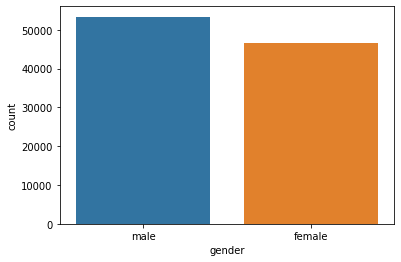

In [59]:
sns.countplot(x='gender',data=df_blog)

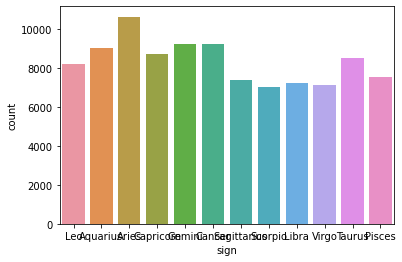

In [60]:
sns.countplot(x='sign',data=df_blog)

In [61]:
df_blog.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

a. Remove unwanted characters

b. Convert text to lowercase

c. Remove unwanted spaces

d. Remove stopwords

In [62]:
# remove unwanted chars other than alphanumeric
pattern = "[^\w ]"
df_blog.text = df_blog.text.apply(lambda s : re.sub(pattern,"",s))

In [63]:
df_blog.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",Info has been found 100 pages and ...
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members Drewes...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoos Toolbar I can no...


In [64]:
#covert text to lower
df_blog.text = df_blog.text.apply(lambda s: s.lower())

In [65]:
df_blog.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info has been found 100 pages and ...
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team members drewes...
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoos toolbar i can no...


In [66]:
#remove unwanted spaces
df_blog.text = df_blog.text.apply(lambda s: s.strip())

In [67]:
df_blog.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info has been found 100 pages and 45 mb of pd...
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team members drewes van der la...
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde maak je e...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoos toolbar i can now capture the...


In [68]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:

#remove stopwords
stopwords=set(stopwords.words('english'))

In [70]:
df_blog.text = df_blog.text.apply(lambda t: ' '.join([words for words in t.split() if words not in stopwords]) )

In [71]:
# drop id and date columns
df_blog.drop(labels=['id','date'], axis=1,inplace=True)

In [72]:
df_blog.head(5)

,gender,age,topic,sign,text
0,male,15,Student,Leo,info found 100 pages 45 mb pdf files wait unti...
1,male,15,Student,Leo,team members drewes van der laag urllink mail ...
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...
3,male,15,Student,Leo,testing testing
4,male,33,InvestmentBanking,Aquarius,thanks yahoos toolbar capture urls popupswhich...


In [73]:
df_blog['labels'] = df_blog.apply(lambda col : [col['gender'],col['age'],col['topic'],col['sign']], axis=1)

In [74]:
df_blog.head()

,gender,age,topic,sign,text,labels
0,male,15,Student,Leo,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,male,15,Student,Leo,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,male,15,Student,Leo,testing testing,"[male, 15, Student, Leo]"
4,male,33,InvestmentBanking,Aquarius,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"


In [75]:
#drop  gender,age,topic & sign as they are already merged to labels column
df_blog.drop(columns=['gender','age','topic','sign'], axis=1, inplace=True)

In [76]:
df_blog.head()

,text,labels
0,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"


Train and Test split

In [77]:
X= df_blog.text
y = df_blog.labels

In [78]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2,test_size = 0.2)

In [79]:
print(X_train.shape)
print(y_train.shape)

(80000,)
(80000,)


In [80]:
print(X_test.shape)
print(y_test.shape)

(20000,)
(20000,)


In [81]:
X_test

6448                      bird buries head mashed potatoes
50680    ok seriously ruined day like mad right wouldnt...
814      astro vs braves got back minute maid stadium d...
20354    greetings welcome first ever blog concept behi...
49224    walks door room always brightens perfect figur...
                               ...                        
47661    hey cool jo problem understandable sounds lots...
56256    last night went see new harry potter movie hon...
92555    urllink instant messages come bearing malice i...
36328    srajan gamers sections class 8th entered compu...
73345    monqiue got back together wasnt quite dramatic...
Name: text, Length: 20000, dtype: object

a. Create a Bag of Words using count vectorizer

i. Use ngram_range=(1, 2)

ii. Vectorize training and testing features

b. Print the term-document matrix

**Vectorization **

In [82]:
cvect = CountVectorizer(ngram_range=(1,2))

In [83]:
#Feed SMS data to CountVectorizer
cvect.fit(X_train)

#Check the vocablury size
len(cvect.vocabulary_)

4517090

In [84]:
cvect.get_feature_names()

['00',
 '00 damarcus',
 '00 damn',
 '00 doesnt',
 '00 dont',
 '00 draw',
 '00 games',
 '00 laughed',
 '00 lil',
 '00 morning',
 '00 really',
 '00 silver',
 '00 sometimes',
 '00 soooooo',
 '00 sq',
 '00 tcr1',
 '00 tie',
 '00 uppercase_75_100',
 '00 watch',
 '00 well',
 '000',
 '000 address',
 '000 available',
 '000 best',
 '000 calories',
 '000 cheaper',
 '000 comptes',
 '000 could',
 '000 duration',
 '000 et',
 '000 first',
 '000 ft',
 '000 fulltime',
 '000 good',
 '000 heh',
 '000 leaving',
 '000 nothing',
 '000 odd',
 '000 people',
 '000 pounds',
 '000 rupees',
 '000 seats',
 '000 sec',
 '000 seems',
 '000 straight',
 '000 subject',
 '000 thats',
 '000 years',
 '000 yen',
 '0000',
 '0000 arent',
 '0000 blinking',
 '0000 hopefully',
 '0000 hrs',
 '0000 new',
 '0000 showed',
 '0000 still',
 '0000 subject',
 '000000',
 '000000 flickrframe',
 '000000 fontfamily',
 '000000 zero',
 '000000000000000000000000167',
 '000000000000000000000000167 grams',
 '000000000000000000000section',
 '0000

In [85]:
X_train_ct = cvect.transform(X_train)

In [86]:
type(X_train_ct)

scipy.sparse.csr.csr_matrix

In [87]:
X_train_ct

<80000x4517090 sparse matrix of type '<class 'numpy.int64'>'
	with 13894625 stored elements in Compressed Sparse Row format>

In [89]:
X_train_ct[0]

<1x4517090 sparse matrix of type '<class 'numpy.int64'>'
	with 483 stored elements in Compressed Sparse Row format>

In [90]:
X_test_ct = cvect.transform(X_test)

In [91]:
X_test_ct

<20000x4517090 sparse matrix of type '<class 'numpy.int64'>'
	with 2633973 stored elements in Compressed Sparse Row format>

In [92]:
cvect.get_feature_names()[:10]

['00',
 '00 damarcus',
 '00 damn',
 '00 doesnt',
 '00 dont',
 '00 draw',
 '00 games',
 '00 laughed',
 '00 lil',
 '00 morning']

In [93]:
print(X_train_ct)

  (0, 10607)	1
  (0, 10627)	1
  (0, 11033)	1
  (0, 11034)	1
  (0, 13953)	1
  (0, 13954)	1
  (0, 42119)	1
  (0, 42120)	1
  (0, 43719)	1
  (0, 43827)	1
  (0, 67010)	1
  (0, 67011)	1
  (0, 92180)	1
  (0, 92184)	1
  (0, 113011)	1
  (0, 113907)	1
  (0, 120596)	2
  (0, 123016)	2
  (0, 181859)	1
  (0, 181920)	1
  (0, 244805)	1
  (0, 244878)	1
  (0, 258494)	1
  (0, 258690)	1
  (0, 263762)	1
  :	:
  (79999, 489553)	1
  (79999, 490590)	1
  (79999, 685736)	1
  (79999, 686275)	1
  (79999, 987793)	1
  (79999, 990497)	1
  (79999, 1275446)	1
  (79999, 1664615)	1
  (79999, 1668927)	1
  (79999, 1934343)	1
  (79999, 1936464)	1
  (79999, 2334456)	1
  (79999, 2335872)	1
  (79999, 2680191)	1
  (79999, 2682769)	1
  (79999, 2689599)	1
  (79999, 2690051)	1
  (79999, 3250596)	1
  (79999, 3250640)	1
  (79999, 3892432)	1
  (79999, 3894880)	1
  (79999, 3948360)	1
  (79999, 3948560)	1
  (79999, 4052512)	1
  (79999, 4052642)	1


In [94]:
print(X_test_ct)

  (0, 466872)	1
  (0, 584973)	1
  (0, 584975)	1
  (0, 1781828)	1
  (0, 2442107)	1
  (0, 2442126)	1
  (0, 3036818)	1
  (1, 8711)	1
  (1, 9452)	1
  (1, 21144)	1
  (1, 67661)	1
  (1, 67771)	1
  (1, 74496)	1
  (1, 78471)	1
  (1, 120596)	2
  (1, 121772)	1
  (1, 126920)	1
  (1, 157801)	2
  (1, 157893)	1
  (1, 178920)	1
  (1, 182108)	1
  (1, 182417)	1
  (1, 183363)	2
  (1, 194027)	1
  (1, 202361)	5
  :	:
  (19999, 3380016)	1
  (19999, 3561611)	1
  (19999, 3575363)	1
  (19999, 3710895)	1
  (19999, 3711708)	1
  (19999, 3757318)	1
  (19999, 3899740)	1
  (19999, 3899777)	1
  (19999, 3934893)	2
  (19999, 3935016)	1
  (19999, 3948360)	1
  (19999, 3952264)	1
  (19999, 4013296)	1
  (19999, 4013848)	1
  (19999, 4021460)	1
  (19999, 4023561)	1
  (19999, 4223852)	1
  (19999, 4223914)	1
  (19999, 4284488)	1
  (19999, 4285835)	1
  (19999, 4304472)	1
  (19999, 4330559)	1
  (19999, 4330886)	1
  (19999, 4363071)	1
  (19999, 4423255)	1


Vectorization for labels

In [96]:
label_counts=dict()

for labels in df_blog.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1

In [99]:
labels

['male', 27, 'Student', 'Virgo']

In [97]:
label_counts

{'13': 1,
 '14': 1,
 '15': 1,
 '16': 1,
 '17': 1,
 '23': 1,
 '24': 1,
 '25': 1,
 '26': 1,
 '27': 1,
 '33': 1,
 '34': 1,
 '35': 1,
 '36': 1,
 '37': 1,
 '38': 1,
 '39': 1,
 '40': 1,
 '41': 1,
 '42': 1,
 '43': 1,
 '44': 1,
 '45': 1,
 '46': 1,
 '47': 1,
 '48': 1,
 'Accounting': 528,
 'Advertising': 766,
 'Agriculture': 168,
 'Aquarius': 9050,
 'Architecture': 83,
 'Aries': 10637,
 'Arts': 5031,
 'Automotive': 124,
 'Banking': 354,
 'Biotech': 324,
 'BusinessServices': 626,
 'Cancer': 9253,
 'Capricorn': 8723,
 'Chemicals': 305,
 'Communications-Media': 2830,
 'Construction': 250,
 'Consulting': 905,
 'Education': 5553,
 'Engineering': 2332,
 'Environment': 6,
 'Fashion': 1898,
 'Gemini': 9225,
 'Government': 2055,
 'HumanResources': 209,
 'Internet': 2251,
 'InvestmentBanking': 244,
 'Law': 360,
 'LawEnforcement-Security': 368,
 'Leo': 8230,
 'Libra': 7250,
 'Manufacturing': 542,
 'Maritime': 59,
 'Marketing': 726,
 'Military': 798,
 'Museums-Libraries': 308,
 'Non-Profit': 1326,
 'Pisces'

Transform the labels 


In [100]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [101]:
y_train = binarizer.fit_transform(y_train)

In [102]:
y_test = binarizer.fit_transform(y_test)

In [103]:
y_train

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [104]:
y_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

Choosing the classifier model


In [105]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [106]:
model=LogisticRegression(solver='lbfgs', max_iter=100)
model=OneVsRestClassifier(model)
model.fit(X_train_ct,y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [108]:
Ypred=model.predict(X_test_ct)

In [109]:
Ypred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [110]:
y_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

Macro Average Method



In [111]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def display_metrics_micro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Micro', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: Micro', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: Micro', recall_score(Ytest, Ypred, average='micro'))
    
    
def display_metrics_macro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Macro', f1_score(Ytest, Ypred, average='macro'))
    print('Average recall score: MAcro', recall_score(Ytest, Ypred, average='macro'))
    
def display_metrics_weighted(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: weighted', f1_score(Ytest, Ypred, average='weighted'))
    print('Average precision score: weighted', average_precision_score(Ytest, Ypred, average='weighted'))
    print('Average recall score: weighted', recall_score(Ytest, Ypred, average='weighted'))
    

In [112]:
display_metrics_micro(y_test,Ypred)

Accuracy score:  0.1085
F1 score: Micro 0.4772290809327846
Average precision score: Micro 0.28872102074235806
Average recall score: Micro 0.3479


In [113]:
display_metrics_macro(y_test,Ypred)

Accuracy score:  0.1085
F1 score: Macro 0.15645343614049567
Average recall score: MAcro 0.10385235689453302


In [114]:
display_metrics_weighted(y_test,Ypred)

Accuracy score:  0.1085
F1 score: weighted 0.43623221118939215
Average precision score: weighted 0.3895466577910168
Average recall score: weighted 0.3479


In [ ]:
true label and predicted label for any five examples


In [118]:
print(binarizer.inverse_transform(Ypred)[20])
print(binarizer.inverse_transform(y_test)[20])

('Sagittarius', 'male')
('Aquarius', 'Education', 'male')


In [121]:
print(binarizer.inverse_transform(Ypred)[55])
print(binarizer.inverse_transform(y_test)[55])

('female',)
('Education', 'Sagittarius', 'female')


In [122]:
print(binarizer.inverse_transform(Ypred)[99])
print(binarizer.inverse_transform(y_test)[99])

('Cancer', 'Education', 'Pisces', 'male')
('Education', 'Pisces', 'male')


In [123]:
print(binarizer.inverse_transform(Ypred)[888])
print(binarizer.inverse_transform(y_test)[888])

('male',)
('Sagittarius', 'indUnk', 'male')


In [124]:
print(binarizer.inverse_transform(Ypred)[250])
print(binarizer.inverse_transform(y_test)[250])

('Student', 'female')
('Sagittarius', 'Student', 'female')
